# Avi Pradhan

## Research question/interests

The question that most interests me is: **What is the differences in the popularities of generes domestically and internationally and what causes them.**

To answer this question I plan on first filtering the data by the highest grossing movies domestically, and then see what genres the top 10 movies have. I will then do the same with international and then world. After that I plan on picking the most common genres out of the top 10 and then reading some articles describing why those genres are popular domestically or internationally.

#  Task 1: Exploratory Data Analysis


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
df = pd.read_csv("../data/raw/Highest Holywood Grossing Movies.csv",index_col=0)


In [3]:
df = df.drop(columns = ['Movie Info', 'Distributor', 'Release Date', 'Movie Runtime', 'License'])
df.head()

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre
0,Star Wars: Episode VII - The Force Awakens (2015),936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame (2019),858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar (2009),760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,Black Panther (2018),700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']"
4,Avengers: Infinity War (2018),678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']"


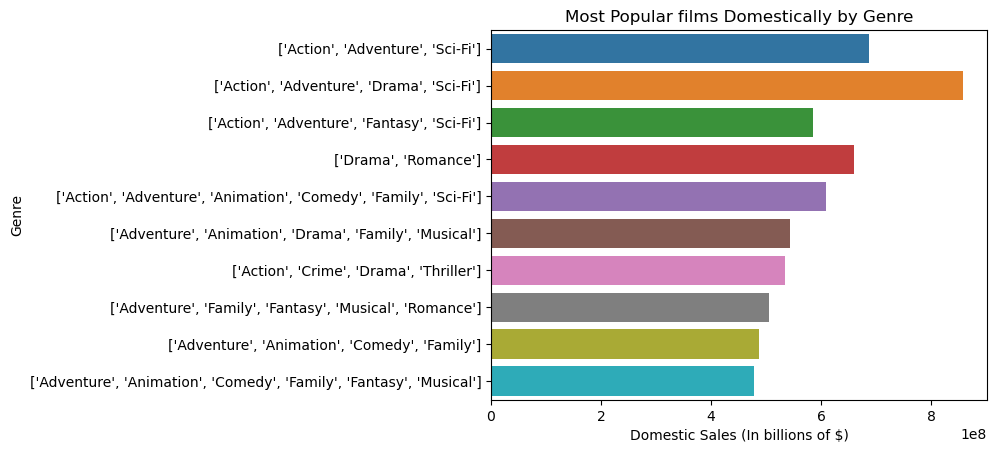

In [4]:
x=sns.barplot(x='Domestic Sales (in $)',y='Genre',data=df.nlargest(20, 'Domestic Sales (in $)').sort_values('Domestic Sales (in $)',ascending = False),orient='h',errorbar=None)
x.set(title='Most Popular films Domestically by Genre',xlabel="Domestic Sales (In billions of $)",ylabel="Genre");

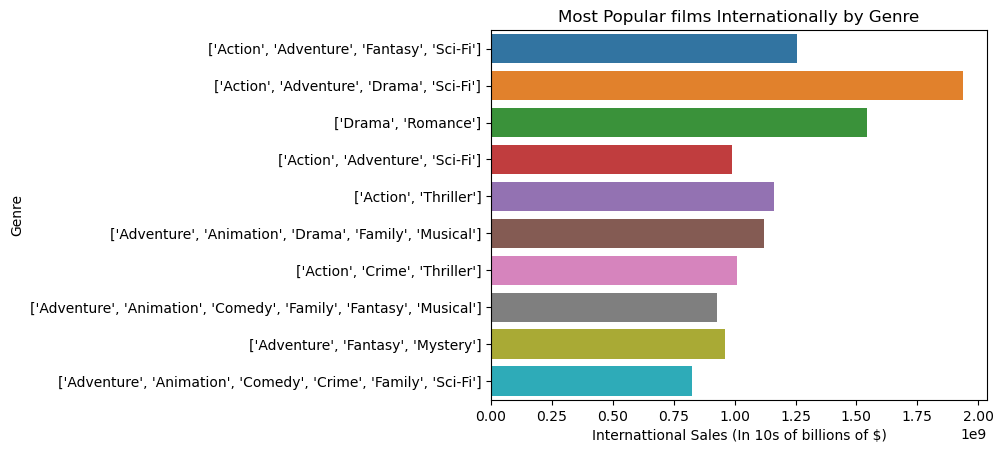

In [ ]:
y=sns.barplot(x='International Sales (in $)',y='Genre',data=df.nlargest(20, 'International Sales (in $)').sort_values('International Sales (in $)',ascending = False),orient='h',errorbar=None)
y.set(title='Most Popular films Internationally by Genre',xlabel="Internattional Sales (In 10s of billions of $)",ylabel="Genre");

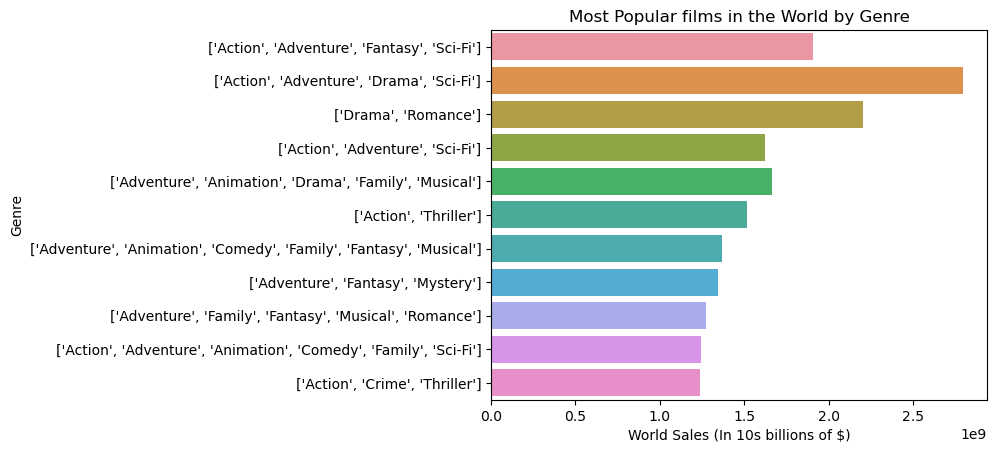

In [ ]:
z=sns.barplot(x='World Sales (in $)',y='Genre',data=df.nlargest(20, 'World Sales (in $)').sort_values('World Sales (in $)',ascending = False),orient='h',errorbar=None)
z.set(title='Most Popular films in the World by Genre',xlabel="World Sales (In 10s billions of $)",ylabel="Genre");

# Observations
From the graphs we can see that there is a fairly consistant trend when it comes to the most popular movie genres. We can see the genre combination of action, adventure, drama, and sci-fi seem to be the most popular category both domestically and internationally. Even with these similarities there are a some differences when it comes to the genre preferences between the domestic audience and the international audience. The graphs show that the domestically the second most popular genre is action, adventure, and sci-fi while interantionally the second most popular genre is drama and romance. This is an interesting difference and could be potentially attributed to the popularity of soap operas in Asian countries but this would require further research.

# Task 2: Refine your research questions
Doing the EDA has shown me that my initial research question was a bit limited as I have already found the answer to my question. I still find the topic of movie genres interesting, to expand on the topic and come up with better data visualisations I could look into the popularity of movie genres over time. To look into this I have come up with a new research question: **How have the relative frequencies of different movie genres changed over time? Are there certain genres that have become more or less popular over the past few decades?** The dataset we chose also has data on the release dates of the movies, using this data I could employ the following data visualization techniques:
- A line plot can be used to show how the frequency of each movie genre has changed over time. I could plot each genre as a separate line on the same plot, or use different colors to distinguish between genres. This would allow me to see which genres have become more or less popular over time.
- A stacked area plot can be used to show how the relative proportions of different genres have changed over time. This would allow you to see not only which genres have become more or less popular, but also how they compare to each other in terms of their overall popularity.
- A violin plot can be used to show the distribution of movie genres over time. This would allow me to see not only the median frequency of each genre, but also how the frequency of each genre varies across different years.
- A  histogram can be used to compare the frequency of different genres across different years. This would allow me to see which genres were more or less popular in each year, and whether there were any trends over time.

To answer the question I could make a new column that contains just the year (or year and month) from the Release Date column. To do this I would use the pandas `to_datetime` function: 
`df['Year'] = pd.to_datetime(df['Release Date']).dt.year`
Once I have this column, I can use it to group the data by year and genre, and calculate the frequency of each genre in each year. I will then use seaborn to visualize how the frequency of each genre has changed over time.
To clean the data up I will clean the Genre column to ensure consistency in the genre names. For example, I will convert all genres to lowercase and remove any irrelevant whitespace or punctuation. This will make it easier to group the data by genre and calculate the frequency of each genre.


# M4 Task 1

In [5]:
df['Genre'] = df['Genre'].str.lower() #Changes genre to lower case
df['Genre'] = df['Genre'].str.replace('[^a-zA-Z0-9\s]', '') #Gets rid of alphanumeric characters
df['Genre'] = df['Genre'].str.strip() #Gets rid of whitespace before and after each genre
df.head()

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre
0,Star Wars: Episode VII - The Force Awakens (2015),936662225,1132859475,2069521700,action adventure scifi
1,Avengers: Endgame (2019),858373000,1939128328,2797501328,action adventure drama scifi
2,Avatar (2009),760507625,2086738578,2847246203,action adventure fantasy scifi
3,Black Panther (2018),700426566,647171407,1347597973,action adventure scifi
4,Avengers: Infinity War (2018),678815482,1369544272,2048359754,action adventure scifi


In [6]:
#drama_movies = df[df['Genre'].str.contains('drama', case=False)]
df['Release Year'] = df['Title'].str[-5:-1]
df['Title'] = df['Title'].str[:-6]
df.head()



,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Release Year
0,Star Wars: Episode VII - The Force Awakens,936662225,1132859475,2069521700,action adventure scifi,2015
1,Avengers: Endgame,858373000,1939128328,2797501328,action adventure drama scifi,2019
2,Avatar,760507625,2086738578,2847246203,action adventure fantasy scifi,2009
3,Black Panther,700426566,647171407,1347597973,action adventure scifi,2018
4,Avengers: Infinity War,678815482,1369544272,2048359754,action adventure scifi,2018


In [5]:
df.to_csv('avi_processed_df.csv', index=False)

In [27]:
import pandas as pd
import re

new_df = pd.DataFrame(columns=['Genre', 'Money'])

genre_money = {}


for index, row in df.iterrows():
   
    genres = re.findall(r'\w+', row['Genre'])

    for genre in genres:
        if genre in genre_money:
            genre_money[genre] += row['World Sales (in $)']
        else:
            genre_money[genre] = row['World Sales (in $)']

for genre, money in genre_money.items():
    new_row = {'Genre': genre, 'Money': money}
    new_df = new_df.append(new_row, ignore_index=True)


new_df.to_csv('avi_Genre_money.csv', index=False)


In [28]:
new_df

,Genre,Money
0,action,188363792761
1,adventure,229470200349
2,scifi,122553076019
3,drama,98963789161
4,fantasy,111657356323
5,romance,46626573801
6,animation,66703180691
7,comedy,131008997340
8,family,98508710535
9,musical,22929353459


# Task 2 
## Method chaining

In [ ]:
df = (
    pd.read_csv("../data/raw/Highest Holywood Grossing Movies.csv",index_col=0)
    .drop(columns=['Movie Info', 'Distributor', 'Release Date', 'Movie Runtime', 'License'])
    .assign(**{'Release Year': lambda x: x['Title'].str[-5:-1]})
    .assign(**{'Title': lambda x: x['Title'].str[:-6]})
    .assign(**{'Genre': lambda x: x['Genre'].str.lower().str.replace('[^a-zA-Z0-9\s]', '').str.strip()})
    
)

df.head()

    

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Release Year
0,Star Wars: Episode VII - The Force Awakens,936662225,1132859475,2069521700,action adventure scifi,2015
1,Avengers: Endgame,858373000,1939128328,2797501328,action adventure drama scifi,2019
2,Avatar,760507625,2086738578,2847246203,action adventure fantasy scifi,2009
3,Black Panther,700426566,647171407,1347597973,action adventure scifi,2018
4,Avengers: Infinity War,678815482,1369544272,2048359754,action adventure scifi,2018


## Wrap your method chain(s) in a function

In [2]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
          .drop(columns=['Movie Info', 'Distributor', 'Release Date', 'Movie Runtime', 'License', 'Unnamed: 0'])
          .assign(**{'Genre': lambda x: x['Genre'].str.lower().str.replace('[^a-zA-Z0-9\s]', '').str.strip()})
          # etc...
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .assign(**{'Release Year': lambda x: x['Title'].str[-5:-1]})
          .assign(**{'Title': lambda x: x['Title'].str[:-6]})
      )

    # Make sure to return the latest dataframe

    return df2 


In [5]:
load_and_process("../data/raw/Highest Holywood Grossing Movies.csv")

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Release Year
0,Star Wars: Episode VII - The Force Awakens,936662225,1132859475,2069521700,action adventure scifi,2015
1,Avengers: Endgame,858373000,1939128328,2797501328,action adventure drama scifi,2019
2,Avatar,760507625,2086738578,2847246203,action adventure fantasy scifi,2009
3,Black Panther,700426566,647171407,1347597973,action adventure scifi,2018
4,Avengers: Infinity War,678815482,1369544272,2048359754,action adventure scifi,2018
...,...,...,...,...,...,...
913,The Notebook,81001787,36813370,117815157,drama romance,2004
914,Jimmy Neutron: Boy Genius,80936232,22056304,102992536,action adventure animation comedy family scifi,2001
915,Eat Pray Love,80574010,124020006,204594016,biography drama romance,2010
916,The Texas Chainsaw Massacre,80571655,26792250,107363905,crime horror,2003


## Step 3: Move your function into a new .py file

In [18]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions1 as pf1
else:
    import sys
    sys.path.append("./code")
    import project_functions1 as pf1

df = pf1.load_and_process("../data/raw/Highest Holywood Grossing Movies.csv")
df

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Release Year
0,Star Wars: Episode VII - The Force Awakens,936662225,1132859475,2069521700,action adventure scifi,2015
1,Avengers: Endgame,858373000,1939128328,2797501328,action adventure drama scifi,2019
2,Avatar,760507625,2086738578,2847246203,action adventure fantasy scifi,2009
3,Black Panther,700426566,647171407,1347597973,action adventure scifi,2018
4,Avengers: Infinity War,678815482,1369544272,2048359754,action adventure scifi,2018
...,...,...,...,...,...,...
913,The Notebook,81001787,36813370,117815157,drama romance,2004
914,Jimmy Neutron: Boy Genius,80936232,22056304,102992536,action adventure animation comedy family scifi,2001
915,Eat Pray Love,80574010,124020006,204594016,biography drama romance,2010
916,The Texas Chainsaw Massacre,80571655,26792250,107363905,crime horror,2003


# Task 3

## Conduct your analysis to help answer your research question(s)

My main research question is **How have the relative frequencies of different movie genres changed over time? Are there certain genres that have become more or less popular over the past few decades?** I will use the strategies that I came up during the EDA to answer it.
- A line plot can be used to show how the frequency of each movie genre has changed over time. I could plot each genre as a separate line on the same plot, or use different colors to distinguish between genres. This would allow me to see which genres have become more or less popular over time. 
- I can also do a line plot to display the popularity of genres by how much money they bring in.
- A violin plot can be used to show the distribution of movie genres over time. This would allow me to see not only the median frequency of each genre, but also how the frequency of each genre varies across different years. 



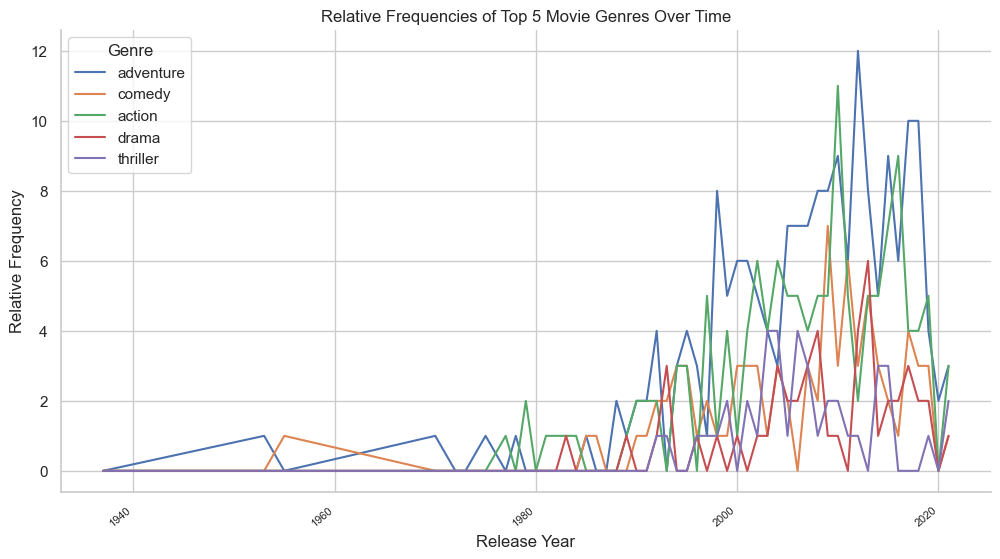

In [55]:
genre_counts = df["Genre"].str.split(expand=True).stack().reset_index(drop=True).rename("Genre")
genre_counts_by_year = pd.crosstab(df["Release Year"], genre_counts)


top5 = genre_counts.value_counts().nlargest(5).index.tolist()

sns.set_style("whitegrid")
q=sns.lineplot(data=genre_counts_by_year[top5], dashes=False)


q.set(title='Relative Frequencies of Top 5 Movie Genres Over Time', xlabel='Release Year', ylabel='Relative Frequency');

q.set_xticklabels(q.get_xticklabels(), rotation=40, ha="right")
q.set_xticklabels(q.get_xticklabels(), fontsize=8)
sns.set(rc={"figure.figsize":(12,6)})
sns.set(font_scale=1.2)
sns.despine()

From this graph we can see that there are two genres in particular that have been very popular since the earliest movie recorded in this dataset. The genres of adventure and action films have been popular since the earliest recorded movie in the dataset, and their popularity has only increased as the years go by. Action movies seem to have hit their peak in 2010 with a relative frequency of 11 while adventure movies hit their peak two years later in 2012 with a relative frequency of 12. It is interesting to note that all genres of movie crashed in 2020, likely due to COVID-19. We can also see that the relative frequency of most of the genres has increased over the years. To read the graph more easily, one has to understand how the relative frequency was calculated. It was calculated using the crosstab function in pandas.The pd.crosstab() method takes two or more categorical variables and calculates the frequency of their combinations. In this case, the variables are the release year and the genre. The resulting DataFrame has the release year as the index and the genres as the columns. The values in the DataFrame represent the frequency of each genre by year. 

Overall, from this graph we can learn the historical trend of the popularity of genres through the years and we can answer the first part of the question, the relative frequency of most movie genres has increased over the years most likely due to the increased popularity of the movie industry over the years. There are a few exceptions though, such as thrillers remaining at the same popularity since its first entry, telling us that the popularity of the genre thriller has stayed the same.


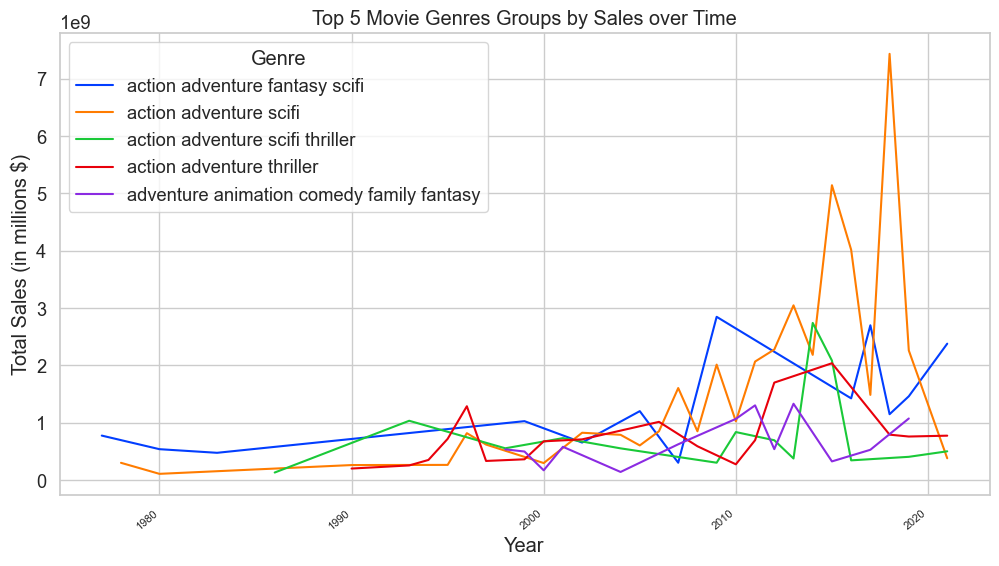

In [83]:
import pandas as pd
import seaborn as sns


df_genre = df.groupby(['Genre', 'Release Year']).sum()

# Get the top 5 genres based on total sales
top_genres = df_genre.groupby('Genre').sum().sort_values(by='World Sales (in $)', ascending=False).head().index.tolist()

# Filter the dataset to include only the top 5 genres
df_top_genres = df_genre[df_genre.index.get_level_values('Genre').isin(top_genres)]

# Reset the index to have Genre and Year as columns
df_top_genres = df_top_genres.reset_index()

# Create the stacked area plot
sns.set_style('whitegrid')
sns.set_palette('bright')

w=sns.lineplot(x='Release Year', y='World Sales (in $)', hue='Genre', data=df_top_genres, palette=sns.color_palette('bright', len(top_genres)), ci=None, estimator=None)

# Set the title and axis labels
w.set(title='Top 5 Movie Genres Groups by Sales over Time',xlabel="Year",ylabel="Total Sales (in Billions of $)");
w.set_xticklabels(w.get_xticklabels(), rotation=40, ha="right");
w.set_xticklabels(w.get_xticklabels(), fontsize=8);



Allmost everysingle movie that is released is a mix of genres and looking at the sales of a movie is another way to judge the popularity of genres. From this lineplot we can see the top 5 most popular groups of genres. Action, adventure, and scifi seem to be the most popular combination of genres as it has only grown over the years. Most of the other groupings of genres have also grown over the years as well. What is interesting is that from the previous graph we saw that the genre of thriller movies did not appear to be as popular when it came to it being used in movies, the same can be said when it comes to total sales as any genre grouping with thriller seems to proform the worst when it comes to total sales, especially in this decade.

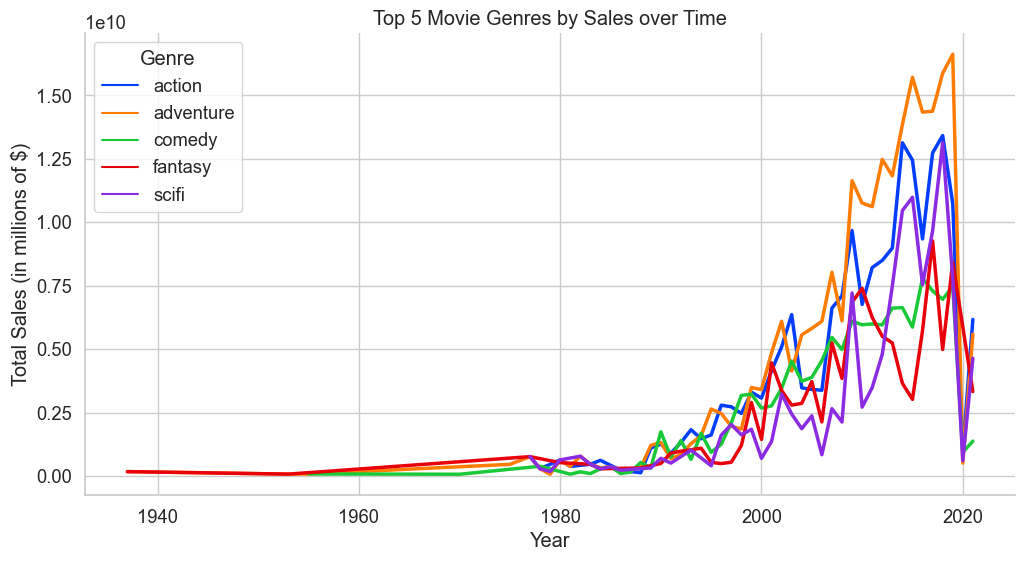

In [84]:

df_genres = df.assign(Genre=df['Genre'].str.split(' ')).explode('Genre')

genre_gross_by_year = df_genres.groupby(['Genre', 'Release Year'])['World Sales (in $)'].sum().reset_index()

top5_genres = genre_gross_by_year.groupby('Genre')['World Sales (in $)'].sum().nlargest(5).index.tolist()

genre_gross_by_year_top5 = genre_gross_by_year[genre_gross_by_year['Genre'].isin(top5_genres)]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
t=sns.lineplot(data=genre_gross_by_year_top5, x='Release Year', y='World Sales (in $)', hue='Genre', palette='bright', linewidth=2.5)
t.set(title='Top 5 Movie Genres by Sales over Time',xlabel="Year",ylabel="Total Sales (in millions of $)")
sns.despine()


For a more granular look at the genres, we can see that adventure is the most popular genre when it comes to making money. However, action and scifi are close behind, themselves being really popular money making genres. With thriller not even being in the top 5 most popular genre of all time.

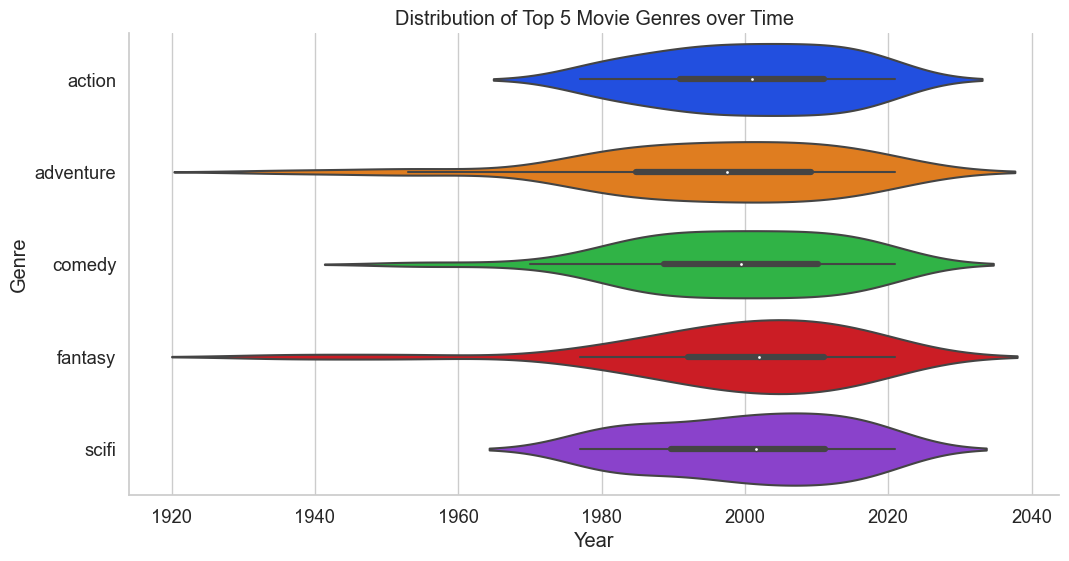

In [102]:
df_genres = df.assign(Genre=df['Genre'].str.split(' ')).explode('Genre')

genre_gross_by_year = df_genres.groupby(['Genre', 'Release Year'])['World Sales (in $)'].sum().reset_index()

top5_genres = genre_gross_by_year.groupby('Genre')['World Sales (in $)'].sum().nlargest(5).index.tolist()

genre_gross_by_year_top5 = genre_gross_by_year[genre_gross_by_year['Genre'].isin(top5_genres)]

sns.set_style("whitegrid")
#plt.figure(figsize=(12,6))
t=sns.violinplot(data=genre_gross_by_year_top5, x='Release Year', y='Genre', palette='bright')
t.set(title='Distribution of Top 5 Movie Genres over Time',xlabel="Year",ylabel="Genre");
sns.despine()


With this violinplot we can see that the median of the distribution of the top 5 movie genres are all very similar/close by. This tells us that the most popular movies all use some combination of these top genres, leading to the similar median points on the graph.

To conclude, all of the top movie genres have shown growth with them growing in popularity over the years. I looked at what constitutes popularity from two different angles, How often movies were made with the respective genres and how much money they have generated. I also have graphs on the most popular genre groups, and the most popular individual genres tended to be a part of those high earning genre groups. From the information I have gathered I can safely say that the genre 'adventure' is the most popular genre right now. The adventure genre gets the most movies made and also earns the most in global sales. The genre 'action' was not far behind and tends to be in the same genre group with adventure. 